In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
#path to merged dataset
merged_dataset = "data/merged_school_zhi_value.csv"

# load merged dataset into dataframe
merged_df = pd.read_csv(merged_dataset)
merged_df = merged_df.drop(columns="Unnamed: 0")
bar_chart_df = merged_df.groupby(['Grade 2019'])
merged_df['Grade 2019'] = merged_df['Grade 2019'].replace(
    {'A': 5, 'B': 4,'C': 3,'D': 2,'F': 1, 'I': 0 })

merged_df.head()


,Zip Code,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,Science Achievement,Social Studies Achievement,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,32603,J. J. FINLEY ELEMENTARY SCHOOL,55.0,57.0,45.0,56.0,59.0,45.0,60.0,NaN,...,286035.0,287334.0,287821.0,289008.0,290524.0,291696.0,291216.0,291212.0,292060.0,292616.0
1,32609,STEPHEN FOSTER ELEMENTARY SCHOOL,63.0,61.0,38.0,69.0,66.0,40.0,58.0,NaN,...,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0,142404.0,144014.0
2,32641,LAKE FOREST ELEMENTARY SCHOOL,23.0,31.0,56.0,26.0,32.0,37.0,18.0,NaN,...,102785.0,103191.0,103928.0,104809.0,106085.0,107431.0,108637.0,109839.0,110873.0,112122.0
3,32605,LITTLEWOOD ELEMENTARY SCHOOL,63.0,61.0,50.0,61.0,66.0,50.0,56.0,NaN,...,207737.0,208196.0,208743.0,209731.0,211050.0,212435.0,213381.0,214302.0,215809.0,218061.0
4,32609,W. A. METCALFE ELEMENTARY SCHOOL,29.0,57.0,80.0,48.0,71.0,62.0,39.0,NaN,...,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0,142404.0,144014.0


In [3]:
#group by zip code
english_merged_df = merged_df.groupby(['Zip Code'])

english_merged_df.head(3)



,Zip Code,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,Science Achievement,Social Studies Achievement,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,32603,J. J. FINLEY ELEMENTARY SCHOOL,55.0,57.0,45.0,56.0,59.0,45.0,60.0,NaN,...,286035.0,287334.0,287821.0,289008.0,290524.0,291696.0,291216.0,291212.0,292060.0,292616.0
1,32609,STEPHEN FOSTER ELEMENTARY SCHOOL,63.0,61.0,38.0,69.0,66.0,40.0,58.0,NaN,...,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0,142404.0,144014.0
2,32641,LAKE FOREST ELEMENTARY SCHOOL,23.0,31.0,56.0,26.0,32.0,37.0,18.0,NaN,...,102785.0,103191.0,103928.0,104809.0,106085.0,107431.0,108637.0,109839.0,110873.0,112122.0
3,32605,LITTLEWOOD ELEMENTARY SCHOOL,63.0,61.0,50.0,61.0,66.0,50.0,56.0,NaN,...,207737.0,208196.0,208743.0,209731.0,211050.0,212435.0,213381.0,214302.0,215809.0,218061.0
4,32609,W. A. METCALFE ELEMENTARY SCHOOL,29.0,57.0,80.0,48.0,71.0,62.0,39.0,NaN,...,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0,142404.0,144014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,32462,VERNON MIDDLE SCHOOL,48.0,51.0,41.0,53.0,53.0,47.0,48.0,74.0,...,91903.0,91902.0,92179.0,92869.0,93624.0,94461.0,95264.0,95934.0,96576.0,97028.0
3322,32428,ROULHAC MIDDLE SCHOOL,56.0,55.0,46.0,61.0,64.0,55.0,49.0,75.0,...,116079.0,116556.0,116927.0,117336.0,117728.0,118164.0,118729.0,119401.0,120083.0,120622.0
3323,32462,VERNON ELEMENTARY SCHOOL,54.0,56.0,51.0,58.0,56.0,40.0,40.0,NaN,...,91903.0,91902.0,92179.0,92869.0,93624.0,94461.0,95264.0,95934.0,96576.0,97028.0
3331,32307,FLORIDA A&M UNIVERSITY DEVELOPMENTAL RESEARCH ...,47.0,51.0,54.0,36.0,30.0,35.0,33.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#end of year price by zip code
price_house_12_19 = english_merged_df["2019-12"].mean()
price_house_12_19.head()

Zip Code
32003    293166.0
32008    133492.0
32009    241314.0
32011    233539.0
32024    183302.0
Name: 2019-12, dtype: float64

In [5]:
#grades per zip code
english_grade = english_merged_df["English Language Arts Achievement"].mean()
english_grade

Zip Code
32003    76.200000
32008    56.000000
32009    84.000000
32011    65.666667
32024    74.500000
           ...    
34987    69.250000
34990    75.500000
34994    63.666667
34996    43.000000
34997    58.000000
Name: English Language Arts Achievement, Length: 806, dtype: float64

In [6]:
median_house_12_19 = english_merged_df["2019-12"].median()
median_house_12_19

Zip Code
32003    293166.0
32008    133492.0
32009    241314.0
32011    233539.0
32024    183302.0
           ...   
34987    276785.0
34990    395699.0
34994    298578.0
34996    549816.0
34997    303936.0
Name: 2019-12, Length: 806, dtype: float64

In [7]:
english_median = english_merged_df["English Language Arts Achievement"].median()
english_median


Zip Code
32003    79.0
32008    56.0
32009    84.0
32011    63.0
32024    74.0
         ... 
34987    67.5
34990    76.5
34994    64.0
34996    43.0
34997    52.0
Name: English Language Arts Achievement, Length: 806, dtype: float64

In [8]:
total_2019 = english_merged_df["Grade 2019"].median()
total_2019

Zip Code
32003    5.0
32008    4.0
32009    5.0
32011    5.0
32024    5.0
        ... 
34987    4.5
34990    5.0
34994    5.0
34996    3.0
34997    4.0
Name: Grade 2019, Length: 806, dtype: float64

In [9]:
zip_grade_df = pd.merge(price_house_12_19, english_grade, on="Zip Code")

zip_grade_df.head()

,2019-12,English Language Arts Achievement
Zip Code,,
32003,293166.0,76.200000
32008,133492.0,56.000000
32009,241314.0,84.000000
32011,233539.0,65.666667
32024,183302.0,74.500000


In [10]:
#grab the column title for each month for housing prices

col_list= ['2019-01','2019-02','2019-03','2019-04',
 '2019-05','2019-06','2019-07','2019-08','2019-09',
 '2019-10','2019-11','2019-12']
col_list

house_average = english_merged_df[col_list].mean()
house_average.head()



,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Zip Code,,,,,,,,,,,,
32003,287864.0,287766.0,287816.0,288849.0,289554.0,290068.0,290329.0,290981.0,292019.0,292803.0,293059.0,293166.0
32008,130079.0,130273.0,130633.0,130933.0,131064.0,131191.0,131345.0,131640.0,131924.0,132222.0,132771.0,133492.0
32009,228914.0,230476.0,232130.0,232619.0,232508.0,232745.0,233207.0,234489.0,235675.0,236848.0,238924.0,241314.0
32011,218095.0,219669.0,221436.0,222726.0,223482.0,224304.0,224966.0,226245.0,228225.0,229770.0,231735.0,233539.0
32024,179343.0,180372.0,181620.0,182774.0,182979.0,183132.0,183388.0,183575.0,183609.0,183580.0,183498.0,183302.0


In [11]:
house_average['2019 House Average'] = house_average[col_list].mean(axis=1)
#print(house_average)
house_average_1 = house_average["2019 House Average"]
house_average_1

Zip Code
32003    290356.166667
32008    131463.916667
32009    234154.083333
32011    225349.333333
32024    182597.666667
             ...      
34987    276487.750000
34990    393074.583333
34994    296011.333333
34996    549282.583333
34997    300847.250000
Name: 2019 House Average, Length: 806, dtype: float64

In [12]:
house_median = english_merged_df[col_list].median()

house_median['2019 House Median'] = house_median[col_list].median(axis=1)

house_median_1 = house_median["2019 House Median"]
house_median_1

Zip Code
32003    290198.5
32008    131268.0
32009    232976.0
32011    224635.0
32024    183217.0
           ...   
34987    276606.5
34990    392757.0
34994    296084.0
34996    549297.5
34997    300636.0
Name: 2019 House Median, Length: 806, dtype: float64

In [13]:
#merge house average with previous merge dataset
zip_grade_df_2 = pd.merge(house_average_1, zip_grade_df, on="Zip Code")

zip_grade_df_3 = pd.merge(zip_grade_df_2, english_median, on="Zip Code")

zip_grade_df_4 = pd.merge(zip_grade_df_3, house_median_1, on="Zip Code")

zip_grade_df_5 = pd.merge(zip_grade_df_4, median_house_12_19, on="Zip Code")

zip_grade_df_6 = pd.merge(zip_grade_df_5, total_2019, on="Zip Code")


#rename columns 
zip_grade_df_6 = zip_grade_df_6.rename(columns={"2019-12_x": "12/19 House Average", "2019-12_y": "12/19 House Median",
                                                "English Language Arts Achievement_x": "English Achievement Average",
                                               "English Language Arts Achievement_y": "English Achievement Median"})

#reorder columns
zip_grade_df_6 = zip_grade_df_6[['12/19 House Average', '12/19 House Median' , '2019 House Average', '2019 House Median',
                                 'English Achievement Average', 'English Achievement Median', 'Grade 2019' ]]



zip_grade_df_6 = zip_grade_df_6.dropna()
zip_grade_df_6


,12/19 House Average,12/19 House Median,2019 House Average,2019 House Median,English Achievement Average,English Achievement Median,Grade 2019
Zip Code,,,,,,,
32003,293166.0,293166.0,290356.166667,290198.5,76.200000,79.0,5.0
32008,133492.0,133492.0,131463.916667,131268.0,56.000000,56.0,4.0
32009,241314.0,241314.0,234154.083333,232976.0,84.000000,84.0,5.0
32011,233539.0,233539.0,225349.333333,224635.0,65.666667,63.0,5.0
32024,183302.0,183302.0,182597.666667,183217.0,74.500000,74.0,5.0
...,...,...,...,...,...,...,...
34987,276785.0,276785.0,276487.750000,276606.5,69.250000,67.5,4.5
34990,395699.0,395699.0,393074.583333,392757.0,75.500000,76.5,5.0
34994,298578.0,298578.0,296011.333333,296084.0,63.666667,64.0,5.0


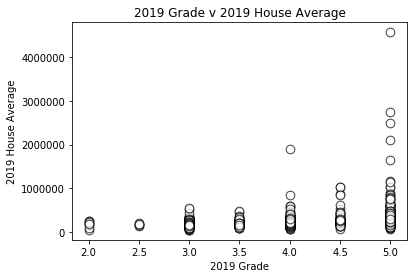

In [48]:
grade = zip_grade_df_6["Grade 2019"]
#english_ach = english_ach.dropna()
#print(english_ach.count())

house_av_19 = zip_grade_df_6["2019 House Average"]
#house_av_19 = house_av_19.dropna()
#print(house_av_19.count())


plt.scatter(grade,house_av_19, marker="o", facecolors="white", edgecolors="black", s=75, alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("2019 Grade v 2019 House Average")
plt.xlabel('2019 Grade')
plt.ylabel('2019 House Average')

plt.savefig('2019_grades.png')

799
799


Text(0, 0.5, '2019 House Average')

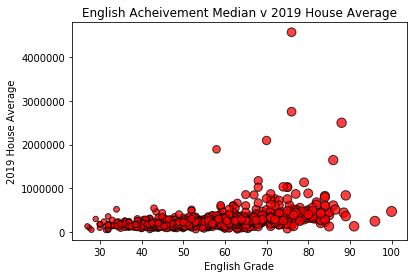

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


english_ach = zip_grade_df_6["English Achievement Median"]
#english_ach = english_ach.dropna()
print(english_ach.count())

house_av_19 = zip_grade_df_6["2019 House Average"]
#house_av_19 = house_av_19.dropna()
print(house_av_19.count())


plt.scatter(english_ach,house_av_19, marker="o", facecolors="red", edgecolors="black", s=english_ach, alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("English Acheivement Median v 2019 House Average")
plt.xlabel('English Grade')
plt.ylabel('2019 House Average')

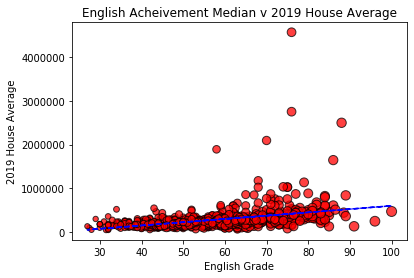

The Linear Regression Equation is y = 7485.09x + -145042.14
The correlation coefficient between english grade and house cost is 0.3845099616595831
The Coefficient of Determination is: 0.14784791061545408


<Figure size 432x288 with 0 Axes>

In [49]:
# Perform a linear regression on mouse weight versus tumor average
slope, int, r, p, std_err = sts.linregress(english_ach, house_av_19)


# Create equation of line to calculate average tumor
fit = slope * english_ach + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot
plt.scatter(english_ach,house_av_19, marker="o", facecolors="red", edgecolors="black", s=english_ach, alpha=0.75)
plt.plot(english_ach,fit,"--", color='b')
#plt.xticks(english_ach)
plt.title("English Acheivement Median v 2019 House Average")
plt.xlabel('English Grade')
plt.ylabel('2019 House Average')
plt.show()

#Calculate the correlation coefficient
print(f"The Linear Regression Equation is {line_eq}")
print(f"The correlation coefficient between english grade and house cost is {r}")
print(f"The Coefficient of Determination is: {r**2}")
plt.savefig('english_grades.png')

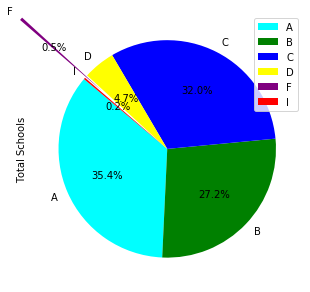

In [50]:
letter_df = pd.DataFrame(bar_chart_df.count().reset_index())
letter_df = letter_df[["Grade 2019","School Name"]]
letter_df = letter_df.rename(columns={"School Name":"Total Schools"})


# Plot the values on a pie plot
colors = ['aqua', 'green', 'blue', 'yellow', 'purple', 'red']
explode = (0, 0, 0, 0, 0.8, 0)
pie_plot = letter_df.plot(explode=explode, kind='pie',y="Total Schools",figsize=(5,5), colors = colors, startangle=140, 
               shadow = False, autopct="%1.1f%%", labels=letter_df["Grade 2019"])
plt.savefig('pie_chart.png')